In [1]:
import pandas as pd
import time,datetime
import numpy as np
from pandas import *
from informs import portfolio
import class_informs as inform

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import math
import random as ran
from scipy.stats import truncnorm
#import seaborn as sbn

import time,datetime
import cmath


import re
import matplotlib.pyplot as plt
import pickle

In [2]:
#timeseries data
all_data=pd.read_csv('data/Timeseries_data_SP500.csv')

all_data['DATE']=pd.to_datetime(all_data['DATE'])
all_data=all_data.rename(columns={'NAME':'name','DATE':'date','SEDOL':'sedol','SECTOR':'sector','BETA':'beta','ALPHA_SCORE':'as','BENCH_WEIGHT':'bw',"MCAP_Q":'mq'})
sedol_list=all_data['sedol'].unique().tolist()

date_list=list(set(list(all_data['date'])))
date_list.sort()


dic_data = {k: v for k, v in all_data.groupby('date')}


results_=pd.read_csv('data/results_template.csv')
results_=results_.rename(columns={'DATE':'date','SEDOL':'sedol','WEIGHTS':'w','FOUR_WEEKLY_RETURN':'r'})
results_['date']=pd.to_datetime(results_['date'])
dic_results_={k: v for k, v in results_.groupby('date')}


def preprocessing(date):
    
    using_dic = dic_data[pd.to_datetime(date)]
    using_dic['index']=list(using_dic.index)

    asset_list = []
    for i in using_dic["sedol"]:
        asset_list.append(i)


    dic_sedol_as = {using_dic["sedol"][i] : using_dic["as"][i] for i in using_dic.index}

    dic_bench = {using_dic["sedol"][i] : using_dic["bw"][i] for i in using_dic.index}

    dic_beta = {using_dic["sedol"][i] : using_dic["beta"][i] for i in using_dic.index}

    dic_sector = {using_dic["sector"][i] : [] for i in using_dic.index }

    dic_MCAP = {using_dic["mq"][i] : [] for i in using_dic.index}

    for i in using_dic.index:
        dic_sector[using_dic["sector"][i]].append(using_dic["sedol"][i])
        dic_MCAP[using_dic["mq"][i]].append(using_dic["sedol"][i])



    #risk:cov_mat
    date_str=str(date)[:10]
    risk_data=pd.read_csv('data/Riskmodels/cov_mat_%s.csv'%(date_str))
    risk_sedol=risk_data['ROW_INDEX'].unique().tolist()
    risk_mat = np.zeros((len(risk_sedol),len(risk_sedol)))
    risk_mat[np.triu_indices(len(risk_sedol), 0)] = list(risk_data['VALUE'])
    irows,icols = np.triu_indices(len(risk_sedol),0)
    risk_mat[icols,irows]=risk_mat[irows,icols]
    #         return risk_data,risk_sedol,risk_mat

    
    alpha = []


    for i in risk_sedol:

        alpha.append(-1*dic_sedol_as[i])

    dic_r={dic_results_[date]["sedol"][i] : dic_results_[date]["r"][i] for i in using_dic.index}

    return using_dic,asset_list,dic_sedol_as,dic_bench,dic_beta,dic_sector,dic_MCAP,risk_sedol,risk_mat,dic_r,alpha

print("complete")

complete


In [3]:
date=date_list[0]
using_dic,asset_list,dic_sedol_as,dic_bench,dic_beta,dic_sector,dic_MCAP,risk_sedol,risk_mat,dic_r,alpha=preprocessing(date)
bw=list(using_dic['bw'])
bw=np.array(bw)

beta=list(using_dic['beta'])
beta=np.array(beta)

alpha=list(using_dic['as'])
alpha=np.array(alpha)

sector_set = set(list(using_dic['sector']))
sector_list = list(using_dic['sector'])

gbs=using_dic[['sector', 'index']].apply(tuple, axis=1)
group_by_sector = [[y[1] for y in gbs if y[0]==x] for x in sector_set]

mq_list=list(using_dic['mq'])
mq_set=set(list(using_dic['mq']))

gbm=using_dic[['mq', 'index']].apply(tuple, axis=1)
group_by_mq = [[y[1] for y in gbm if y[0]==x] for x in mq_set]

nbasset=len(bw)
nbsector=len(sector_set)
nbmq=len(mq_set)


In [102]:
len(list_feasi_obj[0])

4

In [4]:
with open('GAN6.pkl', 'rb') as f:
    list_feasi_obj = pickle.load(f)
    card = pickle.load(f)   
    fea = pickle.load(f)
    w_result = pickle.load(f)
    feasi= pickle.load(f)
    infeasi = pickle.load(f)

# with open('GAN2.pkl', 'rb') as f:
#     list_feasi_obj22 = pickle.load(f)
#     card22 = pickle.load(f)   
#     fea22 = pickle.load(f)
#     w_result22 = pickle.load(f)
#     feasi22= pickle.load(f)
#     infeasi22 = pickle.load(f)
    
# list_feasi_obj+=list_feasi_obj22
# card+=card22
# fea+=fea22
# w_result+=w_result22
# feasi+=feasi22
# infeasi+=infeasi22


gann={}
g_ropt=[]
g=[]
for i in range(len(list_feasi_obj)):
    if len(list_feasi_obj[i])>0:
        g.append((min(list_feasi_obj[i])))

for j in range(len(w_result)):
    rotp_t0=0
    for i in risk_sedol:
        
        rotp_t0 += w_result[j][i]*dic_r[i]
    g_ropt.append(rotp_t0)


risk=[]
retur=[]
real=[]

for j in range(len(g)):
    dfd=[]
    alp=[]
    bw=[]
    
    for i in risk_sedol:
        dfd.append(w_result[j][i]) 
        alp.append(dic_sedol_as[i])
        bw.append(dic_bench[i])
    bw=np.array(bw)
    d=dfd-bw
    risk.append(d.T@risk_mat@d*10000)
    retur.append(d.T@alp*10000)
    real.append(d.T@risk_mat@d*10000-d.T@alp*10000)
    
        
    
gann['ropt']=g_ropt
gann['obj']=g
gann['risk']=risk
gann['return']=retur
gann['real']=real
gann=pd.DataFrame(gann)

print('GAN')
gann


GAN


,obj,real,return,risk,ropt
0,25.439585,25.425017,0.015320,25.440337,0.019397
1,29.149269,29.107766,0.001926,29.109692,0.013687
2,30.713066,30.724410,-0.031363,30.693047,0.012841
3,44.580990,44.541422,0.008076,44.549498,0.005926
4,25.047511,25.008076,0.000071,25.008146,0.021402
5,48.081290,48.115736,0.001680,48.117416,0.015704
6,47.025368,46.992610,0.002790,46.995400,0.012828
7,27.349885,27.388683,-0.034908,27.353775,0.025285
8,41.844919,41.858252,-0.001872,41.856380,0.010024
9,25.058126,25.069237,-0.016696,25.052541,0.022378


In [6]:
with open('Random7.pkl', 'rb') as f:
    list_feasi_obj1 = pickle.load(f)
    card1 = pickle.load(f)   
    fea1 = pickle.load(f)
    w_result1 = pickle.load(f)
    feasi1 = pickle.load(f)
    infeasi1 = pickle.load(f)
    
# with open('Random2.pkl', 'rb') as f:
#     list_feasi_obj122 = pickle.load(f)
#     card122 = pickle.load(f)   
#     fea122 = pickle.load(f)
#     w_result122 = pickle.load(f)
#     feasi122 = pickle.load(f)
#     #infeasi1 = pickle.load(f)
    
# list_feasi_obj1+=list_feasi_obj122
# card1+=card122
# fea1+=fea122
# w_result1+=w_result122
# feasi1+=feasi122

rand={}
r_ropt=[]

for j in range(len(w_result1)):
    rotp_t0=0
    for i in risk_sedol:
        rotp_t0 += w_result1[j][i]*dic_r[i]
    r_ropt.append(rotp_t0)
r=[]
for i in range(len(list_feasi_obj1)):
    if len(list_feasi_obj1[i])>0:
        r.append(max(list_feasi_obj1[i]))

risk=[]
retur=[]
real=[]

for j in range(len(r)):
    dfd=[]
    alp=[]
    bw=[]
    
    for i in risk_sedol:
        dfd.append(w_result1[j][i]) 
        alp.append(dic_sedol_as[i])
        bw.append(dic_bench[i])
    bw=np.array(bw)
    d=dfd-bw
    risk.append(d.T@risk_mat@d*10000)
    retur.append(d.T@alp*10000)
    real.append(d.T@risk_mat@d*10000-d.T@alp*10000)
        
    
rand['ropt']=r_ropt
rand['obj']=r
rand['risk']=risk
rand['return']=retur
rand['real']=real
rand=pd.DataFrame(rand)

print('Random')
rand

Random


,obj,real,return,risk,ropt
0,25.089524,25.089524,-0.011367,25.078157,0.012817
1,25.335330,25.335330,0.023283,25.358613,0.010778
2,25.035524,25.035524,0.019523,25.055047,0.006194
3,24.991774,24.991774,0.013658,25.005432,0.021006
4,25.151952,25.151952,0.003246,25.155198,0.032644
5,25.071622,25.071622,0.004115,25.075737,0.025460
6,25.161767,25.161767,-0.003388,25.158379,0.012215
7,25.188148,25.188148,-0.026129,25.162019,0.014895
8,25.307477,25.307477,-0.044041,25.263436,0.022990
9,25.062218,25.062218,0.015507,25.077725,0.021827


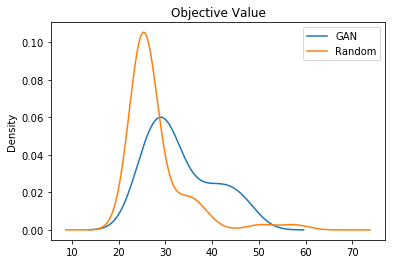

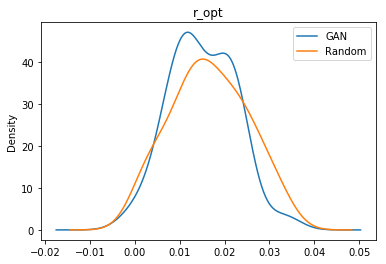

In [7]:
ser =Series(g)
ser2=Series(r)
ser.plot(kind='kde',label='GAN')
ser2.plot(kind='kde',label='Random')
plt.legend()
plt.title('Objective Value')
plt.show()


ser = Series(gann['ropt'])
ser2=Series(rand['ropt'])
ser.plot(kind='kde',label='GAN')
ser2.plot(kind='kde',label='Random')
plt.legend()
plt.title('r_opt')
plt.show()

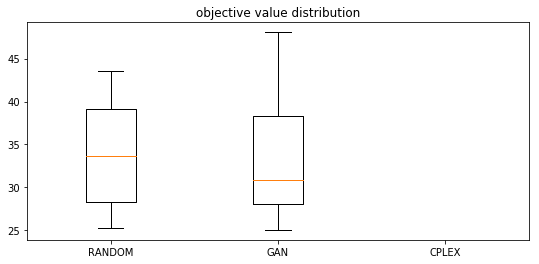

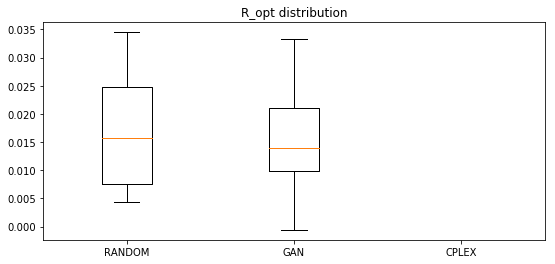

In [51]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
c = []
all_data = [r]+[g]+[c]

# plot violin plot
axes.boxplot(all_data, showfliers =False)
axes.set_title('objective value distribution')
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))], xticklabels=['RANDOM', 'GAN', 'CPLEX'])

axes.boxplot.
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
c = []
all_data2 = [r_ropt]+[g_ropt]+[c]

axes.boxplot(all_data2, showfliers =False)
axes.set_title('R_opt distribution')
plt.setp(axes, xticks=[y+1 for y in range(len(all_data2))], xticklabels=['RANDOM', 'GAN', 'CPLEX'])


plt.show()

In [65]:
# from datascience import stats

print(summary(r))
print(summary(g))
# print("range = ", stats.range(agePhysics))
# plt.boxplot(agePhysics, showmeans=True, whis = 99)

Summary statistics
Min      :  25.25885643251626
Lower Qu.:  27.904878055210016
Median   :  33.65625795734167
Mean     :  33.75
Upper Qu.:  40.17612775514611
Max      :  43.58578374189481
That's all
Summary statistics
Min      :  25.02086915322959
Lower Qu.:  27.77656400037733
Median   :  30.831730965180572
Mean     :  33.235
Upper Qu.:  38.47827898667098
Max      :  48.081290481993044
That's all


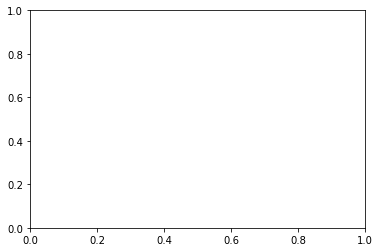

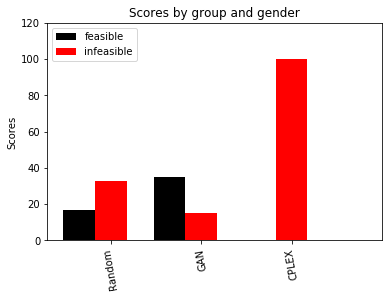

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 3
feasible = [feasi1, feasi, 0]
infeasible = [infeasi1, infeasi, 100]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars       

## the bars
rects1 = ax.bar(ind, feasible, width, color='black', error_kw=dict(elinewidth=2,ecolor='red'))

rects2 = ax.bar(ind+width, infeasible, width, color='red', error_kw=dict(elinewidth=2,ecolor='black'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,120)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
xTickMarks = ['Random', 'GAN', 'CPLEX']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=100, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('feasible', 'infeasible') )
# autolabel(rects1)
# autolabel(rects2)
plt.show()

In [42]:
feasi

35

In [55]:
with open('GAN3.pkl', 'rb') as f:
    list_feasi_obj22 = pickle.load(f)
    card22 = pickle.load(f)   
    fea22 = pickle.load(f)
    w_result22 = pickle.load(f)
    feasi22= pickle.load(f)
    infeasi22 = pickle.load(f)
    
    

In [52]:
card22

[array([  9,  10,  14,  20,  38,  40,  48,  51,  57,  59,  76,  95,  96,
        100, 111, 116, 130, 139, 147, 159, 187, 193, 203, 214, 218, 219,
        222, 232, 233, 237, 249, 256, 261, 262, 263, 266, 268, 269, 276,
        286, 292, 293, 304, 308, 313, 334, 351, 352, 356, 358, 361, 364,
        365, 367, 370, 390, 399, 403, 409, 419, 420, 425, 427, 429, 431,
        471, 488]),
 array([  0,   9,  10,  22,  23,  36,  59,  64,  65,  78,  82,  85,  88,
         92, 112, 125, 138, 141, 148, 158, 169, 177, 178, 192, 201, 212,
        220, 229, 249, 252, 255, 267, 271, 284, 291, 298, 305, 312, 319,
        324, 325, 328, 343, 347, 348, 355, 362, 364, 368, 376, 382, 391,
        396, 397, 403, 407, 428, 430, 439, 441, 442, 445, 448, 449, 469,
        471, 482, 485]),
 array([ 18,  22,  72,  81,  86,  87,  95, 107, 114, 128, 134, 135, 147,
        151, 153, 157, 163, 172, 174, 175, 186, 195, 216, 222, 237, 239,
        240, 241, 253, 255, 256, 258, 261, 263, 264, 278, 281, 296, 298,
      

In [61]:
card_freq=np.zeros(nbasset)
for i in range(len(card22)):
    for j in card22[i]:
        card_freq[j]+=1
# best=np.argsort(sum(sols))[::-1]
np.sort(card_freq)[::-1]

array([ 32.,  31.,  31.,  29.,  28.,  27.,  27.,  27.,  26.,  25.,  25.,
        25.,  25.,  25.,  25.,  25.,  25.,  25.,  25.,  24.,  24.,  24.,
        24.,  24.,  23.,  23.,  23.,  23.,  23.,  23.,  22.,  22.,  22.,
        22.,  22.,  22.,  22.,  22.,  22.,  22.,  21.,  21.,  21.,  21.,
        21.,  21.,  21.,  21.,  21.,  21.,  21.,  21.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  19.,  19.,  19.,  19.,
        19.,  19.,  19.,  19.,  19.,  19.,  19.,  19.,  19.,  19.,  19.,
        18.,  18.,  18.,  18.,  18.,  18.,  18.,  18.,  18.,  18.,  18.,
        18.,  18.,  18.,  18.,  18.,  18.,  18.,  18.,  17.,  17.,  17.,
        17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,
        17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,
        17.,  17.,  17.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,
        16.,  16.,  16.,  16.,  16.,  16.,  16.,  1

In [161]:

date=date_list[1]
using_dic,asset_list,dic_sedol_as,dic_bench,dic_beta,dic_sector,dic_MCAP,risk_sedol,risk_mat,dic_r,alpha=preprocessing(date)

re_=[]
for i in risk_sedol:
    re_.append(dic_r[i])
    
    
risk_sedol1=risk_sedol
dic_r1=dic_r

In [162]:
date=date_list[0]
using_dic,asset_list,dic_sedol_as,dic_bench,dic_beta,dic_sector,dic_MCAP,risk_sedol,risk_mat,dic_r,alpha=preprocessing(date)


risk_sedol2=risk_sedol
dic_sedol_as2=dic_sedol_as
# np.corrcoef(alp,re_)
alp=[]
for i in risk_sedol:
    alp.append(dic_sedol_as[i])
alp=list(np.array(alp)*10000)

In [163]:
alp=[]
re_=[]
for i in risk_sedol1:
    if i in risk_sedol2:
        alp.append(dic_sedol_as2[i]*10000)
        re_.append(dic_r[i])

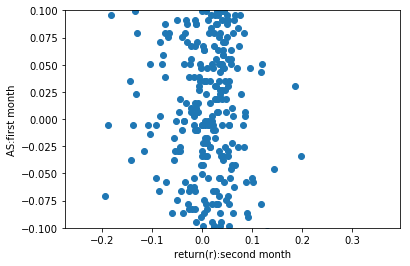

In [165]:
plt.scatter(re_,alp)
plt.ylim(-0.1,0.1)
plt.xlabel('return(r):second month')
plt.ylabel('AS:first month')
plt.show()

In [166]:
len(alp)

491

In [60]:
##  Module stats.py
##
##  Copyright (c) 2015 Mashimo
##
##  Licensed under the Apache License, Version 2.0 (the "License");
##  you may not use this file except in compliance with the License.
##  You may obtain a copy of the License at
##
##  http://www.apache.org/licenses/LICENSE-2.0
##
##  Unless required by applicable law or agreed to in writing, software
##  distributed under the License is distributed on an "AS IS" BASIS,
##  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
##  See the License for the specific language governing permissions and
##  limitations under the License.

"""
Basic statistics module for data analysis and inference
This module provides functions for calculating statistics of data, including
averages, variance, and standard deviation.
All values are rounded by default to 3 digits precision after the comma,
but it can be changed using the argument 'precision'.
See python.org for more information about its floating Point architecture: 
issues and limitations.
"""

# === Exceptions ===

class StatsError(ValueError):
    pass


# === Helper functions ===

def _getOccurencies(dataPoints):
    listOfTerms = {} # all terms found

    for x in dataPoints:
        if x in listOfTerms:
            listOfTerms[x] += 1
        else:
            listOfTerms[x] = 1
                    
    return listOfTerms    

def _diff_mean(x):
      # given a x data set, return an array with the distance between each
	# data point in x and the mean of the input data set x.
	x_bar = mean(x)
	return [x_i - x_bar for x_i in x]
    
# === Measures of central tendency (averages) ===
     
def mean(dataPoints, precision=3):
    """
    the arithmetic average of given data
    Arguments:
        dataPoints: a list of data points, int or float
        precision (optional): digits precision after the comma, default=3
    Returns:
        float, the mean of the input
        or StatsError if X is empty.
    """
    try:
        return round(sum(dataPoints) / float(len(dataPoints)), precision)
    except ZeroDivisionError:
        raise StatsError('no data points passed')

def median(dataPoints):
    """
    the median of given data
    Arguments:
        dataPoints: a list of data points, int or float
    Returns:
        the middle number in the sorted list, a float or an int
    """
    if not dataPoints:
        raise StatsError('no data points passed')
        
    sortedPoints = sorted(dataPoints)
    mid = len(sortedPoints) // 2  # uses the floor division to have integer returned
    if (len(sortedPoints) % 2 == 0):
        # even
        return (sortedPoints[mid-1] + sortedPoints[mid]) / 2.0
    else:
        # odd
        return sortedPoints[mid]
        
    
def mode(dataPoints):
    '''
    All modes (you can have multiple modes in a data set) of the given data
    Argument:
        dataPoints: a list of data points, int or float
    Returns:
        list, the most common number(s) in the argument list
    '''
    if not dataPoints:
        raise StatsError('no data points passed')
        
    dataAndOcc = _getOccurencies(dataPoints)
    
    maxOccurence = max(dataAndOcc.values())
    return [k for k,v in dataAndOcc.items() if v == maxOccurence]

# === Measures of spread ===
    
def stdDev(X, precision=3):
    """
    standard deviation of the given data (population)
    Argument:
        X: data points, a list of int
        precision (optional): digits precision after the comma, default=3
    Returns:
        float, the standard deviation of the input sample
    """

    tot = 0.0
    meanX = mean(X,10)

    for x in X:
        tot += (x - meanX) ** 2
    return round((tot/len(X))**0.5, precision)
        
def coeffVar(X, precision=3):
    """
    Coefficient of variation of the given data (population)
    Argument:
        X: data points, a list of int, do not mix negative and positive numbers
        precision (optional): digits precision after the comma, default=3
    Returns:
        float, the cv (measure of dispersion) of the input sample
        or raise StatsError('mean is zero') if the mean = 0
    """
    try:
        return round(stdDev(X, precision) / mean(X, precision), precision)
    except ZeroDivisionError:
        raise StatsError('mean is zero')
    
def stdDevOfLengths(L):
    """
    standard deviation of the lengths of given strings
    Argument:
        L: a list of strings
    Returns:
        float, the standard deviation of the lengths of the strings,
        or StatsError if L is empty.
    """
    if not L:
        raise StatsError('no data points passed')
        
    strLen = []
    for i in L:
        strLen.append(len(i))
    
    return stdDev(strLen)
  
# === Measures of range ===
def range(dataPoints):
    if not dataPoints:
        raise StatsError('no data points passed')
        
    return max(dataPoints) - min(dataPoints)

def quartiles(dataPoints):
    """
    the lower and upper quartile
    Arguments:
        dataPoints: a list of data points, int or float
    Returns:
        the first and the last quarter in the sorted list, a tuple of float or int
    """
    if not dataPoints:
        raise StatsError('no data points passed')
        
    sortedPoints = sorted(dataPoints)
    mid = len(sortedPoints) // 2 # uses the floor division to have integer returned
    
    if (len(sortedPoints) % 2 == 0):
        # even
        lowerQ = median(sortedPoints[:mid])
        upperQ = median(sortedPoints[mid:])
    else:
        # odd
        lowerQ = median(sortedPoints[:mid])
        upperQ = median(sortedPoints[mid+1:])
            
    return (lowerQ, upperQ)

# === Summary ===
def summary(dataPoints):
    if not dataPoints:
        raise StatsError('no data points passed')
        
    print ("Summary statistics")
    print ("Min      : ", min(dataPoints))
    print ("Lower Qu.: ", quartiles(dataPoints)[0])
    print ("Median   : ", median(dataPoints))
    print ("Mean     : ", mean(dataPoints))
    print ("Upper Qu.: ", quartiles(dataPoints)[1])
    print ("Max      : ", max(dataPoints))
    return "That's all" # this avoids printing None
    
# === Measures of relation ===
def covariance(x, y, precision=3):
    """
    Covariance of two variables
    Arguments:
        x,y: lists of data points, int or float
        precision: digits number of precision for resul (default=3)
    Returns:
        the covariance (float)
    """
    # given two data sets x and y, return their linear relationship
    
    if not x or not y:
        raise StatsError('no data points passed')

    n = len(x)

    if (n == 1):
        raise StatsError('Too few data points')
        
    if n != len(y):
        raise StatsError('the two datasets must have the same length')
        
    vectorsProduct = sum(i*j for i,j in zip(_diff_mean(x),_diff_mean(y)))
    return round(vectorsProduct / (n - 1), precision)
    # using numpy : return np.dot(_diff_mean(x), _diff_mean(y)) / (n - 1)

def correlation(x, y, precision=3):
    """
    Correlation between two variables from a sample
    Arguments:
        x,y: lists of data points (sample), int or float
        precision: digits number of precision for resul (default=3)
    Returns:
        the correlation (float) as Pearson coefficient
    """

    if not x or not y:
        raise StatsError('no data points passed')
        
    if len(x) != len(y):
        raise StatsError('the two datasets must have the same length')

    if len(x) < 3:
        raise StatsError('Too few data points')

        
    x_diff = _diff_mean(x)
    y_diff = _diff_mean(y)


    sum_xy = sum([i * j for i, j in zip(x_diff, y_diff)])
    x_diff_sq = sum([i**2 for i in x_diff])
    y_diff_sq = sum([i**2 for i in y_diff])


    return round(sum_xy / ((x_diff_sq * y_diff_sq)**0.5), precision)

    
def correlationPop(x, y, precision = 3):
    """
    Correlation between two variables from a population
    Arguments:
        x,y: lists of data points (sample), int or float
        precision: digits number of precision for resul (default=3)
    Returns:
        the correlation (float) using the covariance
    """

    stdev_x = stdDev(x)
    stdev_y = stdDev(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / (stdev_x * stdev_y)
    else:
        return 0    # if no variation, correlation is zero


# === Examples of usage : python stats.py ===
if __name__ == "__main__":
    
    X = [10.3, 4.1, 12, 15.5, 20.2, 5.5, 15.5, 4.1]

    print ("=== Stats library - Type help(stats.py) to see the available functions.")
    print ("Examples of usage these functions:")
    print ("-------------")
    print ("X= ", X)
    print ("mean(X) = ", mean(X), " and shall be 10.9")
    print ("median(X) = ", median(X), " and shall be 11.15")
    print ("mode(X) = ", mode(X), " and shall be two: 4.1 and 15.5")
    print ("stdDev(X) = ", stdDev(X), " and shall be 5.613")
    print ("coeffVar(X) = ", coeffVar(X), " and shall be 0.515")
    print ("range(X) = ", range(X), " and shall be 16.1")
    print ("covariance(X,X) = ", covariance(X,X), " and shall be around 36")
    print ("correlation(X,X) = ", correlation(X,X), " and shall be 1 ")
    print ("correlation population(X,X) = ", correlationPop(X,X), " and shall be around 1.14")

    print ("--------------")
    print ("summary(X):")
    summary(X)    

=== Stats library - Type help(stats.py) to see the available functions.
Examples of usage these functions:
-------------
X=  [10.3, 4.1, 12, 15.5, 20.2, 5.5, 15.5, 4.1]
mean(X) =  10.9  and shall be 10.9
median(X) =  11.15  and shall be 11.15
mode(X) =  [4.1, 15.5]  and shall be two: 4.1 and 15.5
stdDev(X) =  5.613  and shall be 5.613
coeffVar(X) =  0.515  and shall be 0.515
range(X) =  16.1  and shall be 16.1
covariance(X,X) =  36.003  and shall be around 36
correlation(X,X) =  1.0  and shall be 1 
correlation population(X,X) =  1.142743095716851  and shall be around 1.14
--------------
summary(X):
Summary statistics
Min      :  4.1
Lower Qu.:  4.8
Median   :  11.15
Mean     :  10.9
Upper Qu.:  15.5
Max      :  20.2
